In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib.colors import ListedColormap

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
class SingleNeuron:
    def __init__(self, input_size, learning_rate=0.1):
        # Initialize weights and bias
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def activation(self, x):
        # Step function for binary output
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        # Calculate weighted sum and apply activation
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activation(weighted_sum)

    def train(self, X, y, epochs=100):
        # Training loop
        for epoch in range(epochs):
            for inputs, label in zip(X, y):
                # Make prediction
                prediction = self.predict(inputs)

                # Calculate error
                error = label - prediction

                # Update weights and bias
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

    def evaluate(self, X, y):
        # Calculate accuracy
        predictions = [self.predict(x) for x in X]
        return np.mean(predictions == y)

# Define AND gate inputs and outputs
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Create and train the neuron
and_neuron = SingleNeuron(input_size=2)
and_neuron.train(X_and, y_and, epochs=100)

# Test the neuron
print("AND Gate Results:")
for inputs in X_and:
    prediction = and_neuron.predict(inputs)
    print(f"Inputs: {inputs}, Prediction: {prediction}, Expected: {np.logical_and(inputs[0], inputs[1]).astype(int)}")

# Calculate accuracy
accuracy = and_neuron.evaluate(X_and, y_and)
print(f"\nAccuracy: {accuracy * 100:.2f}%")


AND Gate Results:
Inputs: [0 0], Prediction: 0, Expected: 0
Inputs: [0 1], Prediction: 0, Expected: 0
Inputs: [1 0], Prediction: 0, Expected: 0
Inputs: [1 1], Prediction: 1, Expected: 1

Accuracy: 100.00%


In [3]:
class FeedforwardNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.random.randn(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.random.randn(output_size)
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Forward propagation
        self.hidden_input = np.dot(X, self.W1) + self.b1
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.W2) + self.b2
        self.output = self.sigmoid(self.output_input)
        return self.output

    def backward(self, X, y, output):
        # Backward propagation
        output_error = y - output
        output_delta = output_error * self.sigmoid_derivative(output)

        hidden_error = output_delta.dot(self.W2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.W2 += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.b2 += np.sum(output_delta, axis=0) * self.learning_rate
        self.W1 += X.T.dot(hidden_delta) * self.learning_rate
        self.b1 += np.sum(hidden_delta, axis=0) * self.learning_rate

    def train(self, X, y, epochs=10000):
        # Training loop
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

            # Print loss every 1000 epochs
            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        # Make predictions
        output = self.forward(X)
        return (output > 0.5).astype(int)

# Define XOR gate inputs and outputs
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# Create and train the network
xor_nn = FeedforwardNN(input_size=2, hidden_size=2, output_size=1)
print("\nTraining XOR Network:")
xor_nn.train(X_xor, y_xor, epochs=10000)

# Test the network
print("\nXOR Gate Results:")
for inputs in X_xor:
    prediction = xor_nn.predict(inputs.reshape(1, -1))[0]
    print(f"Inputs: {inputs}, Prediction: {prediction[0]}, Expected: {np.logical_xor(inputs[0], inputs[1]).astype(int)}")

# Calculate accuracy
predictions = xor_nn.predict(X_xor)
accuracy = np.mean(predictions == y_xor)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Test the same network on AND gate
print("\nTesting the XOR Network on AND Gate:")
for inputs in X_and:
    prediction = xor_nn.predict(inputs.reshape(1, -1))[0]
    print(f"Inputs: {inputs}, Prediction: {prediction[0]}, Expected: {np.logical_and(inputs[0], inputs[1]).astype(int)}")

predictions_and = xor_nn.predict(X_and)
accuracy_and = np.mean(predictions_and == y_and.reshape(-1, 1))
print(f"\nAND Accuracy: {accuracy_and * 100:.2f}%")


Training XOR Network:
Epoch 0, Loss: 0.2568
Epoch 1000, Loss: 0.2450
Epoch 2000, Loss: 0.2105
Epoch 3000, Loss: 0.1612
Epoch 4000, Loss: 0.1429
Epoch 5000, Loss: 0.1358
Epoch 6000, Loss: 0.1325
Epoch 7000, Loss: 0.1306
Epoch 8000, Loss: 0.1295
Epoch 9000, Loss: 0.1287

XOR Gate Results:
Inputs: [0 0], Prediction: 0, Expected: 0
Inputs: [0 1], Prediction: 0, Expected: 1
Inputs: [1 0], Prediction: 1, Expected: 1
Inputs: [1 1], Prediction: 1, Expected: 0

Accuracy: 50.00%

Testing the XOR Network on AND Gate:
Inputs: [0 0], Prediction: 0, Expected: 0
Inputs: [0 1], Prediction: 0, Expected: 0
Inputs: [1 0], Prediction: 1, Expected: 0
Inputs: [1 1], Prediction: 1, Expected: 1

AND Accuracy: 75.00%



Training MLP on Moons Dataset:
Epoch 0, Loss: 0.1514, Accuracy: 0.8829
Epoch 100, Loss: 0.0292, Accuracy: 0.9771
Epoch 200, Loss: 0.0271, Accuracy: 0.9786
Epoch 300, Loss: 0.0267, Accuracy: 0.9800
Epoch 400, Loss: 0.0259, Accuracy: 0.9786
Epoch 500, Loss: 0.0243, Accuracy: 0.9800
Epoch 600, Loss: 0.0238, Accuracy: 0.9800
Epoch 700, Loss: 0.0220, Accuracy: 0.9843
Epoch 800, Loss: 0.0223, Accuracy: 0.9814
Epoch 900, Loss: 0.0232, Accuracy: 0.9814

Test Accuracy: 97.33%


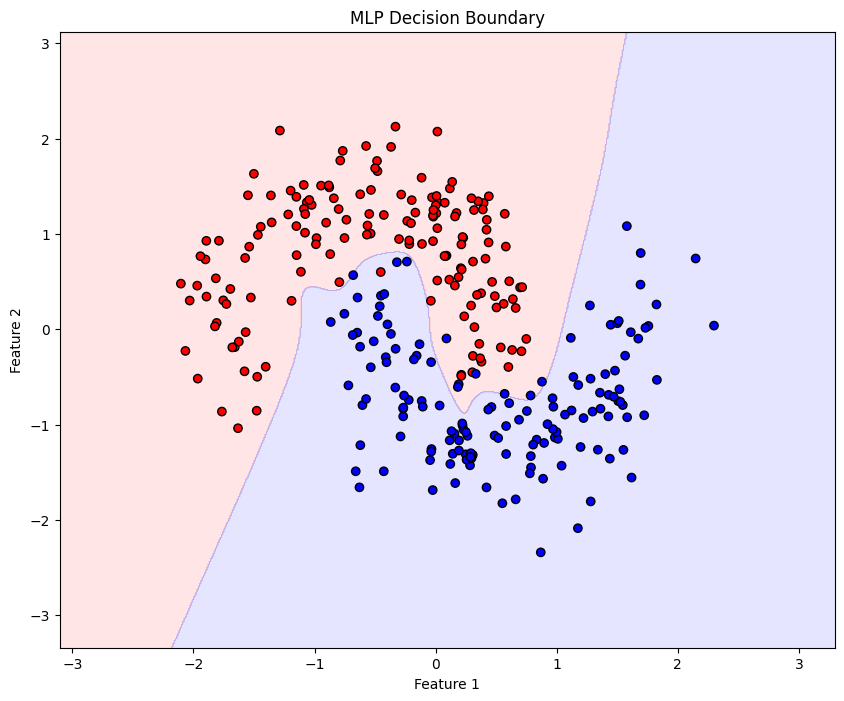

In [4]:
class MLP:
    def __init__(self, layer_sizes, learning_rate=0.1, activation='sigmoid'):
        # Initialize network architecture
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.activation_name = activation

        # Initialize weights and biases
        self.weights = []
        self.biases = []

        for i in range(len(layer_sizes) - 1):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i+1]))
            self.biases.append(np.random.randn(layer_sizes[i+1]))

    def activation(self, x):
        if self.activation_name == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation_name == 'tanh':
            return np.tanh(x)
        elif self.activation_name == 'relu':
            return np.maximum(0, x)
        else:
            raise ValueError("Activation function not supported")

    def activation_derivative(self, x):
        if self.activation_name == 'sigmoid':
            return x * (1 - x)
        elif self.activation_name == 'tanh':
            return 1 - x**2
        elif self.activation_name == 'relu':
            return (x > 0).astype(float)
        else:
            raise ValueError("Activation function not supported")

    def softmax(self, x):
        # Subtract max for numerical stability
        exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def forward(self, X):
        # Forward propagation
        self.layer_outputs = [X]

        for i in range(len(self.weights) - 1):
            layer_input = np.dot(self.layer_outputs[-1], self.weights[i]) + self.biases[i]
            layer_output = self.activation(layer_input)
            self.layer_outputs.append(layer_output)

        # Output layer with softmax for classification
        output_input = np.dot(self.layer_outputs[-1], self.weights[-1]) + self.biases[-1]
        output = self.softmax(output_input)
        self.layer_outputs.append(output)

        return output

    def backward(self, X, y, output):
        # Backward propagation
        m = X.shape[0]

        # Calculate error at output
        error = output - y
        delta = error

        # Backpropagate through layers
        for i in range(len(self.weights) - 1, -1, -1):
            # Calculate gradients
            dW = np.dot(self.layer_outputs[i].T, delta) / m
            db = np.sum(delta, axis=0) / m

            # Update weights and biases
            self.weights[i] -= self.learning_rate * dW
            self.biases[i] -= self.learning_rate * db

            # Calculate delta for next layer (except for input layer)
            if i > 0:
                delta = np.dot(delta, self.weights[i].T) * self.activation_derivative(self.layer_outputs[i])

    def train(self, X, y, epochs=1000, batch_size=32, verbose=True):
        # Training loop with mini-batches
        m = X.shape[0]

        for epoch in range(epochs):
            # Shuffle data
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Mini-batch gradient descent
            for i in range(0, m, batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                # Forward and backward pass
                output = self.forward(X_batch)
                self.backward(X_batch, y_batch, output)

            # Print loss and accuracy every 100 epochs
            if verbose and epoch % 100 == 0:
                output = self.forward(X)
                loss = -np.mean(y * np.log(output + 1e-10))
                predictions = np.argmax(output, axis=1)
                labels = np.argmax(y, axis=1)
                accuracy = np.mean(predictions == labels)
                print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    def predict(self, X):
        # Make predictions
        output = self.forward(X)
        return np.argmax(output, axis=1)

# Generate a more complex dataset (moons)
X_moons, y_moons = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
y_train_onehot = np.eye(2)[y_train]
y_test_onehot = np.eye(2)[y_test]

# Create and train the MLP
mlp = MLP(layer_sizes=[2, 10, 10, 2], learning_rate=0.1, activation='tanh')
print("\nTraining MLP on Moons Dataset:")
mlp.train(X_train, y_train_onehot, epochs=1000, batch_size=32)

# Evaluate the model
predictions = mlp.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# Visualize decision boundary
def plot_decision_boundary(model, X, y):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolor='k')
    plt.title('MLP Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(mlp, X_test, y_test)